In [9]:
# # Import general libraries (needed for functions)
# import numpy as np
# import matplotlib.pyplot as plt
# import qiskit_experiments.library.randomized_benchmarking as rb
# import qiskit.circuit.library as circuits

# from qiskit_experiments.library import StandardRB, InterleavedRB
# from qiskit_experiments.framework import ParallelExperiment, BatchExperiment

# from IPython import display
# from qiskit import assemble, transpile
# from qiskit_aer import AerSimulator
# from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
#     pauli_error, depolarizing_error, thermal_relaxation_error)
# from qiskit_ibm_runtime.fake_provider import FakePerth

# backend = AerSimulator.from_backend(FakePerth())

In [1]:
import numpy as np
from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
import qiskit.circuit.library as circuits

# For simulation
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakePerth

backend = AerSimulator.from_backend(FakePerth())

In [2]:
lengths_2_qubit = np.arange(1, 200, 30)
lengths_1_qubit = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = (1, 2)

# Run a 1-qubit RB experiment on qubits 1, 2 to determine the error-per-gate of 1-qubit gates
single_exps = BatchExperiment(
    [
        StandardRB((qubit,), lengths_1_qubit, num_samples=num_samples, seed=seed)
        for qubit in qubits
    ],
    flatten_results=True,
)
expdata_1q = single_exps.run(backend).block_for_results()

Gate error ratio: {'cx': 1.0}


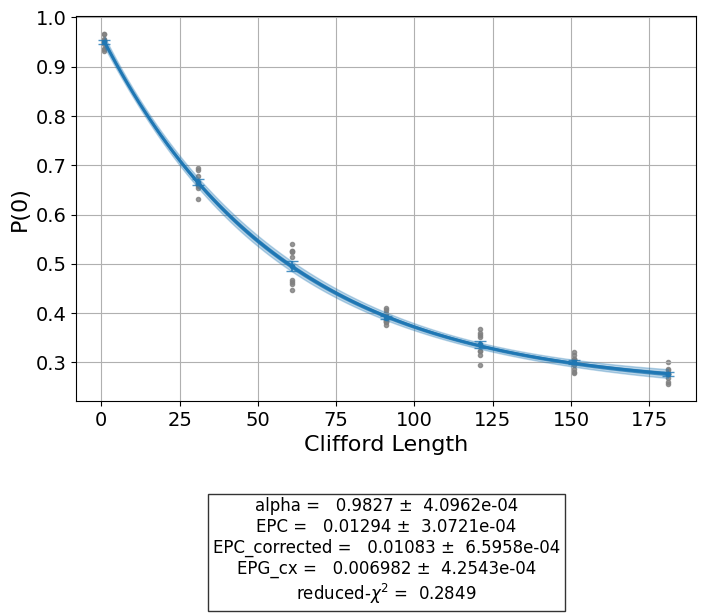

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 20
 - degree of freedom: 4
 - chi-square: 1.1397062840266092
 - reduced chi-square: 0.2849265710066523
 - Akaike info crit.: -6.705976958051512
 - Bayesian info crit.: -6.868246510885572
 - init params:
  * a = 0.7127848714148415
  * alpha = 0.9819950557070994
  * b = 0.25
 - fit params:
  * a = 0.715990238355958 ± 0.005573304243347276
  * alpha = 0.9827424454522191 ± 0.00040961957786274063
  * b = 0.24670436296966766 ± 0.004997408423652164
 - correlations:
  * (alpha, b) = -0.8756946531020586
  * (a, b) = -0.753666010150427
  * (a, alpha) = 0.5332304985076863
- quality: good
- extra: <2 items>
- device_components: ['Q1', 'Q2']
- verified: False
AnalysisResult
- name: alpha
- value: 0.9827+/-0.0004
- χ²: 0.2849265710066523
- quality: good
- extra: <2 items>
- device_compone

In [3]:
# Run an RB experiment on qubits 1, 2
exp_2q = StandardRB(qubits, lengths_2_qubit, num_samples=num_samples, seed=seed)

# Use the EPG data of the 1-qubit runs to ensure correct 2-qubit EPG computation
exp_2q.analysis.set_options(epg_1_qubit=expdata_1q.analysis_results())

# Run the 2-qubit experiment
expdata_2q = exp_2q.run(backend).block_for_results()

# View result data
print("Gate error ratio: %s" % expdata_2q.experiment.analysis.options.gate_error_ratio)
display(expdata_2q.figure(0))
for result in expdata_2q.analysis_results():
    print(result)